# Lab 6

You are tasked with evaluating card counting strategies for black jack. In order to do so, you will use object oriented programming to create a playable casino style black jack game where a computer dealer plays against $n$ computer players and possibily one human player. If you don't know the rules of blackjack or card counting, please google it. 

A few requirements:
* The game should utilize multiple 52-card decks. Typically the game is played with 6 decks.
* Players should have chips.
* Dealer's actions are predefined by rules of the game (typically hit on 16). 
* The players should be aware of all shown cards so that they can count cards.
* Each player could have a different strategy.
* The system should allow you to play large numbers of games, study the outcomes, and compare average winnings per hand rate for different strategies.

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import random
import copy

1. Begin by creating a classes to represent cards and decks. The deck should support more than one 52-card set. The deck should allow you to shuffle and draw cards. Include a "plastic" card, placed randomly in the deck. Later, when the plastic card is dealt, shuffle the cards before the next deal.

In [10]:
class Card:
  def __init__(self,name,suit):
    self.name=name
    self.suit=suit
    self.value=None
    self.rating=None

  def assign_card(self):
    if self.name=='plastic':
      self.value=None
    elif self.name=='Ace':
      self.value=[1,11]
    elif self.name=='King' or self.name=='Queen' or self.name=='Jack':
      self.value=10
    else:
      self.value=int(self.name)

    return self.value

  def assign_rating(self):
    if self.name=='plastic':
      self.rating=None
    elif self.assign_card()==10 or self.name=='Ace':
      self.rating=(-1)
    else:
      if 2<=self.assign_card()<=6:
        self.rating=1
      else:
        self.rating=0

    return self.rating

  def show_self(self):
    return (self.name,self.suit)


class Deck:
  def __init__(self,number):
    self.number=number
    self.decks=list()

  def make_deck(self):
    suits=['Hearts','Diamonds','Clubs','Spades']
    names=['2','3','4','5','6','7','8','9','10','Jack','Queen','King','Ace']
    deck=list()
    for name in names:
      for suit in suits:
        deck.append(Card(name,suit))
    deck.append(Card('plastic',None))
    return deck

  def fill_deck(self):
    for i in range(self.number):
      deck=self.make_deck()
      self.decks.append(deck)

  def check_first(self):
    if len(self.decks)==0 or len(self.decks[0])==0:
        self.decks=list()
        self.fill_deck()
    elif len(self.decks[0])==0:
      self.decks.remove(self.decks[0])

  def convert_deck(self,deck_number):
    return self.decks[deck_number+1]

  def shuffle(self):
    if len(self.decks)==0:
      self.fill_deck()
    for i in range(self.number):
      shuffled_d=list()
      deck=self.decks[0]
      use_deck=copy.deepcopy(deck)
      for j in range(len(deck)):
        choice=random.choice(use_deck)
        shuffled_d.append(choice)
        use_deck.remove(choice)
      self.decks.remove(self.decks[0])
      self.decks.append(shuffled_d)


2. Now design your game on a UML diagram. You may want to create classes to represent, players, a hand, and/or the game. As you work through the lab, update your UML diagram. At the end of the lab, submit your diagram (as pdf file) along with your notebook. 

3. Begin with implementing the skeleton (ie define data members and methods/functions, but do not code the logic) of the classes in your UML diagram.

In [ ]:
#class Hand:
  #def __init__(self,value=0):
    #self.value=value
    #self.cards=list()

  #def draw_card(self,deck):
    # method will randomly select a card from the given deck

  #def add_card1(self,card):
    # method will append card to self.cards
    # if card is an 'Ace', card value will be 1

  #def add_card11(self,card):
    # method will append card to self.cards
    # if card is an 'Ace', card value will be 11

  #def new_hand(self):
    # method will reset the hand
    

#class Player:
  #def __init__(self,name,chips=0,bank=1000):
    #self.chips=chips
    #self.bank=bank
    #self.hand=None

  #def add_hand(self):
    # method will initialize the player's hand

  #def hand_value(self):
    # method will show the value of the player's hand

  #def bet_chips(self,amount):
    # method will set aside chips to bet for winning or losing

  #def lose_chips(self,amount,dealer):
    # method will subtract the amount from the player's bank
    # lost chips will be added to the dealer's chips/bank

  #def add_chips(self,amount):
    # method will add the amount to the player's bank

  #def hit(self,deck):
    # method will draw card from the given deck
    # the drawn card will be added to the player's hand
    # value of a drawn 'Ace' card will be based on the player's hand value
    
    
#class Dealer(Player):
    #def __init__(self,name="Dealer",hand=Hand(),chips=100000):
        #super().__init__(name,chips)
        #self.name=name
        #self.hand=hand
        #self.chips=chips

    #def play(self,deck):
        # based on dealer rules
        # if the dealer's hand value is less than 17
        
#class HumanPlayer(Player):
    #def __init__(self,name,hand=Hand(),chips=0,bank=1000):
      #super().__init__(name,chips)
      #self.name=name
      #self.chips=chips
      #self.bank=bank
      #self.hand=hand

    #def decide(self):
        # method will have an input 
        # if player inputs 'Hit' method will return True
        # if player inputs 'Stay' method will return False
        


#class BlackJackGame:
  #def __init__(self,num_players,num_deck,bet=0):
    #self.num_players=num_players
    #self.players=[HumanPlayer(f"Player {i + 1}",1000) for i in range(num_players)]
    #self.dealer=Dealer()
    #self.deck=Deck(num_deck)
    #self.bet=bet

  #def start_game(self,num_loop):
    # method will first fill and shuffle the deck of cards
    # then will play however many games is given as 'num_loop'

  #def play_round(self):
    # method will play a round
    # first players will be asked to input a bet
    # players and dealer will reset their hands 
    # players and dealer will hit twice to collect two cards
    # player will be asked to decide to hit or stay
    # if player's hand value is greater than 21 the player will no longer
    # be able to decide
    # dealer will play based on above method
    # winner will be determined

  #def determine_winner(self):
    # method will determine win or loss of a player
    # if player hand value is greater than 21, the player busts
    # if player hand value is 21, the player wins via Blackjack
    # if player hand value is greater than dealer, the player wins
    # if player hand value is less than dealer, the player loses
    # if player hand value is equal to dealer's, player and dealer tie

4. Complete the implementation by coding the logic of all functions. For now, just implement the dealer player and human player.

In [11]:
class Hand:
  def __init__(self,value=0):
    self.value=value
    self.cards=list()

  def draw_card(self,deck):
    deck.check_first()
    if deck.decks[0][0].name=='plastic':
      deck.shuffle()
      card=deck.decks[0][0]
      deck.decks[0].pop(0)
    else:
      card=deck.decks[0][0]
      deck.decks[0].pop(0)
    return card

  def add_card1(self,card):
    if card.name=='Ace':
      value=card.assign_card()[0]
    else:
      value=card.assign_card()
    self.cards.append(card)
    self.value +=value

  def add_card11(self,card):
    if card.name=='Ace':
      value=card.assign_card()[1]
    else:
      value=card.assign_card()
    self.cards.append(card)
    self.value +=value

  def new_hand(self):
    self.cards=list()
    self.value=0

In [4]:
class Player:
  def __init__(self,name,chips=0,bank=1000):
    self.chips=chips
    self.bank=bank
    self.hand=None

  def add_hand(self):
    self.hand=Hand()

  def hand_value(self):
    return self.hand.value

  def bet_chips(self,amount):
    self.chips +=amount
    self.bank -=amount

  def lose_chips(self,amount,dealer):
    self.chips -=amount
    dealer.chips +=amount

  def add_chips(self,amount):
    self.chips +=amount
    self.bank +=self.chips

  def hit(self,deck):
    if self.hand.value<=10:
        deck.check_first()
        self.hand.add_card11(self.hand.draw_card(deck))
    elif self.hand.value<=21:
        deck.check_first()
        self.hand.add_card1(self.hand.draw_card(deck))

In [12]:
class Dealer(Player):
    def __init__(self,name="Dealer",hand=Hand(),chips=100000):
        super().__init__(name,chips)
        self.name=name
        self.hand=hand
        self.chips=chips

    def play(self,deck):
      while self.hand.value<17:
          self.hit(deck)

In [13]:
class HumanPlayer(Player):
    def __init__(self,name,hand=Hand(),chips=0,bank=1000):
      super().__init__(name,chips)
      self.name=name
      self.chips=chips
      self.bank=bank
      self.hand=hand

    def decide(self):
        while True:
          choice=input(f"{self.name}'s hand value is {self.hand.value}. Do they want to hit (H) or stay (S)? ")
          if choice.upper()=='H':
              return True
          elif choice.upper()=='S':
              return False

In [15]:
class BlackJackGame:
  def __init__(self,num_players,num_deck,bet=0):
    self.num_players=num_players
    self.players=[HumanPlayer(f"Player {i + 1}",1000) for i in range(num_players)]
    self.dealer=Dealer()
    self.deck=Deck(num_deck)
    self.bet=bet

  def start_game(self,num_loop):
    print("A new game has begun.")
    self.deck.fill_deck()
    self.deck.shuffle()
    for i in range(num_loop):
      if len(self.deck.decks)==0:
        break
      else:
        self.play_round()
    print("\nThe game has ended.")

  def play_round(self):
    print("\nA new round has begun. \n")
    for player in self.players:
      bet=int(input(f"How much does {player.name} want to bet? "))
      self.bet +=bet
      player.bet_chips(bet)
      player.add_hand()
      for start in range(2):
        player.hit(self.deck)
    self.dealer.add_hand()
    for start in range(2):
      self.dealer.hit(self.deck)
    for player in self.players:
      while True:
        if player.hand_value()>21:
          break
        elif player.decide():
          player.hit(self.deck)
        else:
          break
    self.dealer.play(self.deck)
    self.determine_winner()

  def determine_winner(self):
    dealer_score=self.dealer.hand_value()
    for player in self.players:
      player_score=player.hand_value()
      if player_score>21:
        player.lose_chips(player.chips,self.dealer)
        print(f"{player.name} busted.")
      elif player_score==21 and not dealer_score==21:
        player.add_chips(player.chips*1.5)
        print(f"{player.name} got a Blackjack! {player.name} wins!")
      elif player_score>dealer_score:
        player.add_chips(player.chips*1.5)
        print(f"{player.name} wins!")
      elif player_score<dealer_score:
        player.lose_chips(player.chips,self.dealer)
        print(f"{player.name} loses.")
      else:
        player.add_chips(0)
        print(f"{player.name} ties with the dealer.")

5.  Test. Demonstrate game play. For example, create a game of several dealer players and show that the game is functional through several rounds.

In [16]:
game=BlackJackGame(3,6)
game.start_game(3)

A new game has begun.

A new round has begun. 

How much does Player 1 want to bet? 20
How much does Player 2 want to bet? 20
How much does Player 3 want to bet? 20
Player 1's hand value is 12. Do they want to hit (H) or stay (S)? h
Player 1's hand value is 15. Do they want to hit (H) or stay (S)? h
Player 2's hand value is 10. Do they want to hit (H) or stay (S)? h
Player 2's hand value is 13. Do they want to hit (H) or stay (S)? h
Player 3's hand value is 20. Do they want to hit (H) or stay (S)? s
Player 1 busted.
Player 2 busted.
Player 3 wins!

A new round has begun. 

How much does Player 1 want to bet? 20
How much does Player 2 want to bet? 20
How much does Player 3 want to bet? 20
Player 1's hand value is 15. Do they want to hit (H) or stay (S)? h
Player 2's hand value is 9. Do they want to hit (H) or stay (S)? h
Player 2's hand value is 13. Do they want to hit (H) or stay (S)? h
Player 2's hand value is 19. Do they want to hit (H) or stay (S)? s
Player 3's hand value is 12. Do 

6. Implement a new player with the following strategy:

    * Assign each card a value: 
        * Cards 2 to 6 are +1 
        * Cards 7 to 9 are 0 
        * Cards 10 through Ace are -1
    * Compute the sum of the values for all cards seen so far.
    * Hit if sum is very negative, stay if sum is very positive. Select a threshold for hit/stay, e.g. 0 or -2.  

In [17]:
class Hand:
  def __init__(self,value=0):
    self.value=value
    self.cards=list()

  def draw_card(self,deck):
    deck.check_first()
    while deck.decks[0][0].name=='plastic':
      deck.decks[0].pop(0)
      deck.shuffle()
      deck.check_first()
      card=deck.decks[0][0]
      deck.decks[0].pop(0)
      deck.check_first()
    else:
      card=deck.decks[0][0]
      deck.decks[0].remove(deck.decks[0][0])
      deck.check_first()
    return card

  def add_card1(self,card):
    if card.name=='Ace':
      value=card.assign_card()[0]
    else:
      value=card.assign_card()
    self.cards.append(card)
    self.value +=value

  def add_card11(self,card):
    if card.name=='Ace':
      value=card.assign_card()[1]
    else:
      value=card.assign_card()
    self.cards.append(card)
    self.value +=value

  def new_hand(self):
    self.cards=list()
    self.value=0


class Player:
  def __init__(self,name,chips,winnings=0):
    self.chips=0
    self.winnings=winnings
    self.bank=chips
    self.hand=None
    self.bank2=chips

  def reset_player(self):
    self.chips=0
    self.winnings=0
    self.bank=self.bank2

  def add_hand(self):
    self.hand=Hand()

  def hand_value(self):
    return self.hand.value

  def bet_chips(self,amount):
    self.chips +=amount
    self.bank -=amount

  def lose_chips(self,amount,dealer):
    self.chips -=amount
    dealer.chips +=amount

  def add_chips(self,amount):
    self.chips +=amount
    self.bank +=self.chips

  def hit(self,deck):
    if self.hand.value<=10:
        card=self.hand.draw_card(deck)
        card_rating=card.assign_rating()
        self.hand.add_card11(card)
        return card_rating
    elif self.hand.value<=21:
        card=self.hand.draw_card(deck)
        card_rating=card.assign_rating()
        self.hand.add_card1(card)
        return card_rating

  def check_bank(self):
    if self.bank<=0 and not self.chips<=0:
      self.bank=self.chips
      return False
    elif self.bank<=0 and self.chips<=0:
      self.chips=0
      self.bank=0
      return True
    else:
      return False

In [18]:
class Dealer(Player):
    def __init__(self,name="Dealer",hand=Hand(),chips=1000000,winnings=0):
        super().__init__(name,chips)
        self.name=name
        self.hand=hand
        self.chips=chips
        self.winnings=winnings
        self.chips2=chips

    def reset_dealer(self):
      self.chips=self.chips2
      self.winnings=0

    def play(self,deck):
      while self.hand.value<17:
          self.hit(deck)

class HumanPlayer(Player):
    def __init__(self,name,chips,hand=Hand(),winnings=0):
      super().__init__(name,chips,winnings)
      self.name=name
      self.chips=0
      self.bank=chips
      self.hand=hand
      self.winnings=winnings
      self.bank2=chips

    def decide(self):
        while True:
          if self.hand.value==21:
              choice='S'
          elif self.hand.value>=18:
              choice=random.choice(['H','S','S','S'])
          else:
              choice=random.choice(['H','H','H','S'])
          if choice.upper()=='H':
              return True
          elif choice.upper()=='S':
              return False

class StrategyPlayer(Player):
    def __init__(self,name,chips,hand=Hand(),winnings=0):
      super().__init__(name,chips,winnings)
      self.name=name
      self.chips=0
      self.bank=chips
      self.hand=hand
      self.winnings=winnings
      self.bank2=chips

    def decide(self,rating):
        while True:
          if self.hand.value<19 and rating<=-1:
              return True
          else:
              return False


In [19]:
class BlackJackGame:
  def __init__(self,num_human_players,num_strategy_players,num_deck,bet=0,rating=0):
    self.num_human_players=num_human_players
    self.num_strategy_players=num_strategy_players
    self.players=[HumanPlayer(f"Player {i +1}",10000) for i in range(num_human_players)]
    for j in range(num_strategy_players):
      strat_player=StrategyPlayer(f"Player {num_human_players +1 +j}",10000)
      self.players.append(strat_player)
    self.dealer=Dealer()
    self.deck=Deck(num_deck)
    self.rating=rating

  def start_game(self,num_loop):
    self.deck.fill_deck()
    self.deck.shuffle()
    self.rating=0
    for player in self.players:
      player.reset_player()
    self.dealer.reset_dealer()
    for i in range(num_loop):
      if len(self.deck.decks)==0:
        break
      else:
        self.play_round()
    winnings=list()
    for player in self.players:
      winnings.append(player.winnings)
    return winnings

  def play_round(self):
    self.deck.check_first()
    for player in self.players:
      if isinstance(player,StrategyPlayer):
        if player.check_bank():
          break
    for player in self.players:
      if player.check_bank():
        bet=0
      else:
        bet=random.randint(1,500)
      player.bet_chips(bet)
      player.add_hand()
      for start in range(2):
        rate=player.hit(self.deck)
        self.rating +=rate
      self.dealer.add_hand()
      for i in range(2):
        rate=self.dealer.hit(self.deck)
        self.rating +=rate
    for player in self.players:
      if isinstance(player,HumanPlayer):
        while True:
          if player.hand_value()>21:
            break
          elif player.decide():
            rate=player.hit(self.deck)
            self.rating +=rate
          else:
            break
      elif isinstance(player,StrategyPlayer):
        while True:
          if player.hand_value()>21:
            break
          elif player.decide(self.rating):
            rate=player.hit(self.deck)
            self.rating +=rate
          else:
            break
    self.dealer.play(self.deck)
    self.determine_winner()


  def determine_winner(self):
    dealer_score=self.dealer.hand_value()
    for player in self.players:
      player_score=player.hand_value()
      if player_score>21:
        self.dealer.winnings +=player.chips
        player.lose_chips(player.chips,self.dealer)
      elif player_score==21 and not dealer_score==21:
        player.winnings +=player.chips*1.5
        player.add_chips(player.chips*1.5)
      elif player_score>dealer_score:
        player.winnings +=player.chips*1.5
        player.add_chips(player.chips*1.5)
      elif player_score<dealer_score:
        self.dealer.winnings +=player.chips
        player.lose_chips(player.chips,self.dealer)
      else:
        player.add_chips(0)

7. Create a test scenario where one player, using the above strategy, is playing with a dealer and 3 other players that follow the dealer's strategy. Each player starts with same number of chips. Play 50 rounds (or until the strategy player is out of money). Compute the strategy player's winnings. You may remove unnecessary printouts from your code (perhaps implement a verbose/quiet mode) to reduce the output.

In [20]:
game2=BlackJackGame(3,1,6)
game2.start_game(50)

[6108.0, 6253.5, 4723.5, 5772.0]

In [21]:
game2.dealer.winnings

70842.0

8. Create a loop that runs 100 games of 50 rounds, as setup in previous question, and store the strategy player's chips at the end of the game (aka "winnings") in a list. Histogram the winnings. What is the average winnings per round? What is the standard deviation. What is the probabilty of net winning or lossing after 50 rounds?


In [22]:
winnings_list0=list()
num_rounds=50
for i in range(100):
  winnings_list0.append(game2.start_game(num_rounds)[3])

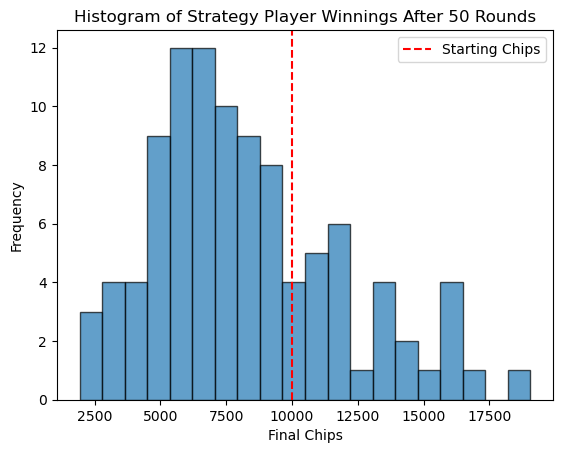

Average winnings per round: 165.82
Standard deviation of winnings: 3628.18
Probability of net winning: 27.00%
Probability of net losing: 73.00%


In [23]:
# Collect all statistics
average_winnings_per_round_list=list()
std_dev_list=list()
prob_winning_list=list()
prob_losing_list=list()

# Compute statistics
average_winnings_per_round = np.mean(winnings_list0)/num_rounds
std_dev = np.std(winnings_list0)
prob_winning = np.mean(np.array(winnings_list0) > game2.players[0].bank2)
prob_losing = np.mean(np.array(winnings_list0) < game2.players[0].bank2)

# Append all statistics
average_winnings_per_round_list.append(float(average_winnings_per_round))
std_dev_list.append(float(std_dev))
prob_winning_list.append(float(prob_winning))
prob_losing_list.append(float(prob_losing))

# Plot histogram
plt.hist(winnings_list0, bins=20, edgecolor='black', alpha=0.7)
plt.xlabel('Final Chips')
plt.ylabel('Frequency')
plt.title('Histogram of Strategy Player Winnings After 50 Rounds')
plt.axvline(game2.players[0].bank2, color='red', linestyle='dashed', label='Starting Chips')
plt.legend()
plt.show()

# Print results
print(f"Average winnings per round: {average_winnings_per_round:.2f}")
print(f"Standard deviation of winnings: {std_dev:.2f}")
print(f"Probability of net winning: {prob_winning:.2%}")
print(f"Probability of net losing: {prob_losing:.2%}")

9. Repeat previous questions scanning the value of the threshold. Try at least 5 different threshold values. Can you find an optimal value?

In [24]:
class StrategyPlayer(Player):
    def __init__(self,name,chips,hand=Hand(),winnings=0):
      super().__init__(name,chips,winnings)
      self.name=name
      self.chips=0
      self.bank=chips
      self.hand=hand
      self.winnings=winnings
      self.bank2=chips

    def decide(self,rating):
        while True:
          if self.hand.value<19 and rating<=1:
              return True
          else:
              return False

winnings_list=list()
num_rounds=50
for i in range(100):
  winnings_list.append(game2.start_game(num_rounds)[3])

# Compute statistics
average_winnings_per_round = np.mean(winnings_list)/num_rounds
std_dev = np.std(winnings_list)
prob_winning = np.mean(np.array(winnings_list) > game2.players[0].bank2)
prob_losing = np.mean(np.array(winnings_list) < game2.players[0].bank2)

# Append all statistics
average_winnings_per_round_list.append(float(average_winnings_per_round))
std_dev_list.append(float(std_dev))
prob_winning_list.append(float(prob_winning))
prob_losing_list.append(float(prob_losing))

# Print results
print(f"Average winnings per round: {average_winnings_per_round:.2f}")
print(f"Standard deviation of winnings: {std_dev:.2f}")
print(f"Probability of net winning: {prob_winning:.2%}")
print(f"Probability of net losing: {prob_losing:.2%}")

Average winnings per round: 25.69
Standard deviation of winnings: 1057.42
Probability of net winning: 0.00%
Probability of net losing: 100.00%


In [25]:
class StrategyPlayer(Player):
    def __init__(self,name,chips,hand=Hand(),winnings=0):
      super().__init__(name,chips,winnings)
      self.name=name
      self.chips=0
      self.bank=chips
      self.hand=hand
      self.winnings=winnings
      self.bank2=chips

    def decide(self,rating):
        while True:
          if self.hand.value<19 and rating<=0:
              return True
          else:
              return False

winnings_list=list()
num_rounds=50
for i in range(100):
  winnings_list.append(game2.start_game(num_rounds)[3])

# Compute statistics
average_winnings_per_round = np.mean(winnings_list)/num_rounds
std_dev = np.std(winnings_list)
prob_winning = np.mean(np.array(winnings_list) > game2.players[0].bank2)
prob_losing = np.mean(np.array(winnings_list) < game2.players[0].bank2)

# Append all statistics
average_winnings_per_round_list.append(float(average_winnings_per_round))
std_dev_list.append(float(std_dev))
prob_winning_list.append(float(prob_winning))
prob_losing_list.append(float(prob_losing))

# Print results
print(f"Average winnings per round: {average_winnings_per_round:.2f}")
print(f"Standard deviation of winnings: {std_dev:.2f}")
print(f"Probability of net winning: {prob_winning:.2%}")
print(f"Probability of net losing: {prob_losing:.2%}")

Average winnings per round: 23.54
Standard deviation of winnings: 804.68
Probability of net winning: 0.00%
Probability of net losing: 100.00%


In [26]:
class StrategyPlayer(Player):
    def __init__(self,name,chips,hand=Hand(),winnings=0):
      super().__init__(name,chips,winnings)
      self.name=name
      self.chips=0
      self.bank=chips
      self.hand=hand
      self.winnings=winnings
      self.bank2=chips

    def decide(self,rating):
        while True:
          if self.hand.value<19 and rating<=-2:
              return True
          else:
              return False

winnings_list=list()
num_rounds=50
for i in range(100):
  winnings_list.append(game2.start_game(num_rounds)[3])

# Compute statistics
average_winnings_per_round = np.mean(winnings_list)/num_rounds
std_dev = np.std(winnings_list)
prob_winning = np.mean(np.array(winnings_list) > game2.players[0].bank2)
prob_losing = np.mean(np.array(winnings_list) < game2.players[0].bank2)

# Append all statistics
average_winnings_per_round_list.append(float(average_winnings_per_round))
std_dev_list.append(float(std_dev))
prob_winning_list.append(float(prob_winning))
prob_losing_list.append(float(prob_losing))

# Print results
print(f"Average winnings per round: {average_winnings_per_round:.2f}")
print(f"Standard deviation of winnings: {std_dev:.2f}")
print(f"Probability of net winning: {prob_winning:.2%}")
print(f"Probability of net losing: {prob_losing:.2%}")

Average winnings per round: 26.60
Standard deviation of winnings: 870.67
Probability of net winning: 0.00%
Probability of net losing: 100.00%


In [27]:
class StrategyPlayer(Player):
    def __init__(self,name,chips,hand=Hand(),winnings=0):
      super().__init__(name,chips,winnings)
      self.name=name
      self.chips=0
      self.bank=chips
      self.hand=hand
      self.winnings=winnings
      self.bank2=chips

    def decide(self,rating):
        while True:
          if self.hand.value<19 and rating<=-3:
              return True
          else:
              return False

winnings_list=list()
num_rounds=50
for i in range(100):
  winnings_list.append(game2.start_game(num_rounds)[3])

# Compute statistics
average_winnings_per_round = np.mean(winnings_list)/num_rounds
std_dev = np.std(winnings_list)
prob_winning = np.mean(np.array(winnings_list) > game2.players[0].bank2)
prob_losing = np.mean(np.array(winnings_list) < game2.players[0].bank2)

# Append all statistics
average_winnings_per_round_list.append(float(average_winnings_per_round))
std_dev_list.append(float(std_dev))
prob_winning_list.append(float(prob_winning))
prob_losing_list.append(float(prob_losing))

# Print results
print(f"Average winnings per round: {average_winnings_per_round:.2f}")
print(f"Standard deviation of winnings: {std_dev:.2f}")
print(f"Probability of net winning: {prob_winning:.2%}")
print(f"Probability of net losing: {prob_losing:.2%}")

Average winnings per round: 20.81
Standard deviation of winnings: 746.67
Probability of net winning: 0.00%
Probability of net losing: 100.00%


In [28]:
class StrategyPlayer(Player):
    def __init__(self,name,chips,hand=Hand(),winnings=0):
      super().__init__(name,chips,winnings)
      self.name=name
      self.chips=0
      self.bank=chips
      self.hand=hand
      self.winnings=winnings
      self.bank2=chips

    def decide(self,rating):
        while True:
          if self.hand.value<19 and rating<=-4:
              return True
          else:
              return False

winnings_list=list()
num_rounds=50
for i in range(100):
  winnings_list.append(game2.start_game(num_rounds)[3])

# Compute statistics
average_winnings_per_round = np.mean(winnings_list)/num_rounds
std_dev = np.std(winnings_list)
prob_winning = np.mean(np.array(winnings_list) > game2.players[0].bank2)
prob_losing = np.mean(np.array(winnings_list) < game2.players[0].bank2)

# Append all statistics
average_winnings_per_round_list.append(float(average_winnings_per_round))
std_dev_list.append(float(std_dev))
prob_winning_list.append(float(prob_winning))
prob_losing_list.append(float(prob_losing))

# Print results
print(f"Average winnings per round: {average_winnings_per_round:.2f}")
print(f"Standard deviation of winnings: {std_dev:.2f}")
print(f"Probability of net winning: {prob_winning:.2%}")
print(f"Probability of net losing: {prob_losing:.2%}")

Average winnings per round: 23.05
Standard deviation of winnings: 809.25
Probability of net winning: 0.00%
Probability of net losing: 100.00%


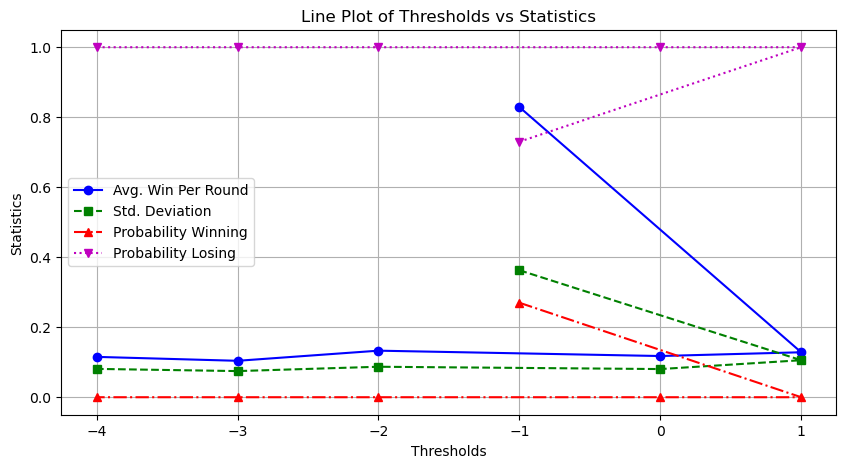

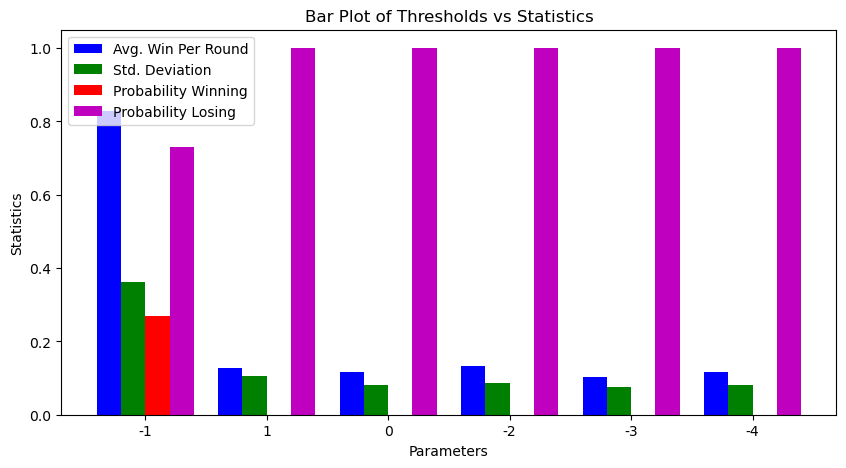

In [29]:
# Data
parameters = [-1, 1, 0, -2, -3, -4]

for i in range(6):
  average_winnings_per_round_list[i]=(average_winnings_per_round_list[i]/200)
  std_dev_list[i]=(std_dev_list[i]/10000)

# Convert parameters to string for bar plot labels
param_labels = [str(p) for p in parameters]

# --- Line Plot ---
plt.figure(figsize=(10, 5))
plt.plot(parameters, average_winnings_per_round_list, marker='o', label="Avg. Win Per Round", linestyle='-', color='b')
plt.plot(parameters, std_dev_list, marker='s', label="Std. Deviation", linestyle='--', color='g')
plt.plot(parameters, prob_winning_list, marker='^', label="Probability Winning", linestyle='-.', color='r')
plt.plot(parameters, prob_losing_list, marker='v', label="Probability Losing", linestyle=':', color='m')
plt.xlabel("Thresholds")
plt.ylabel("Statistics")
plt.title("Line Plot of Thresholds vs Statistics")
plt.legend()
plt.grid(True)
plt.show()

# --- Bar Plot ---
x = np.arange(len(parameters))  # X-axis positions
width = 0.2  # Bar width

plt.figure(figsize=(10, 5))
plt.bar(x - 1.5*width, average_winnings_per_round_list, width, label="Avg. Win Per Round", color='b')
plt.bar(x - 0.5*width, std_dev_list, width, label="Std. Deviation", color='g')
plt.bar(x + 0.5*width, prob_winning_list, width, label="Probability Winning", color='r')
plt.bar(x + 1.5*width, prob_losing_list, width, label="Probability Losing", color='m')
plt.xlabel("Parameters")
plt.ylabel("Statistics")
plt.title("Bar Plot of Thresholds vs Statistics")
plt.xticks(x, param_labels)  # Set x-axis labels
plt.legend()
plt.show()


10. Create a new strategy based on web searches or your own ideas. Demonstrate that the new strategy will result in increased or decreased winnings. 

In [30]:
class StrategyPlayer(Player):
    def __init__(self,name,chips,hand=Hand(),winnings=0):
      super().__init__(name,chips,winnings)
      self.name=name
      self.chips=0
      self.bank=chips
      self.hand=hand
      self.winnings=winnings
      self.bank2=chips

    def decide(self,dealer_upcard):   #using basic strategy of blackjack game
      while True:
          check=list()
          for card in self.hand.cards:
            if card.name=='Ace':
              check.append('Yes Ace')
            elif card.name=='King' or card.name=='Queen' or card.name=='Jack' or card.name=='10':
              check.append('Yes 10')
            elif card.name=='9' or card.name=='8' or card.name=='7':
              check.append('Yes High')
            elif card.name=='6' or card.name=='5' or card.name=='4' or card.name=='3' or card.name=='2':
              check.append('Yes Low')
          if check==['Yes Ace','Yes High']:
            return False
            break
          elif check==['Yes Ace','Yes Low']:
            return True
            break
          elif not 'Yes Ace' in check:
            if self.hand.value>=17:
              return False
              break
            elif 12<=self.hand.value<17 and dealer_upcard.assign_card()<=6:
              return False
              break
            elif 12<=self.hand.value<17 and dealer_upcard.assign_card()>6:
              return True
              break
            elif self.hand.value<12:
              return True
              break
          elif len(check)<2:
            continue
          else:
            return False
            break


class BlackJackGame:
  def __init__(self,num_human_players,num_strategy_players,num_deck,bet=0,rating=0):
    self.num_human_players=num_human_players
    self.num_strategy_players=num_strategy_players
    self.players=[HumanPlayer(f"Player {i +1}",10000) for i in range(num_human_players)]
    for j in range(num_strategy_players):
      strat_player=StrategyPlayer(f"Player {num_human_players +1 +j}",10000)
      self.players.append(strat_player)
    self.dealer=Dealer()
    self.deck=Deck(num_deck)
    self.rating=rating

  def start_game(self,num_loop):
    self.deck.fill_deck()
    self.deck.shuffle()
    self.rating=0
    for player in self.players:
      player.reset_player()
    self.dealer.reset_dealer()
    for i in range(num_loop):
      if len(self.deck.decks)==0:
        break
      else:
        self.play_round()
    winnings=list()
    for player in self.players:
      winnings.append(player.winnings)
    return winnings

  def play_round(self):
    self.deck.check_first()
    for player in self.players:
      if isinstance(player,StrategyPlayer):
        if player.check_bank():
          break
    for player in self.players:
      if player.check_bank():
        bet=0
      else:
        bet=random.randint(1,500)
      player.bet_chips(bet)
      player.add_hand()
      for start in range(2):
        rate=player.hit(self.deck)
        self.rating +=rate
      self.dealer.add_hand()
      for i in range(2):
        rate=self.dealer.hit(self.deck)
        self.rating +=rate
    for player in self.players:
      if isinstance(player,HumanPlayer):
        while True:
          if player.hand_value()>21:
            break
          elif player.decide():
            rate=player.hit(self.deck)
            self.rating +=rate
          else:
            break
      elif isinstance(player,StrategyPlayer):
        while True:
          if player.hand_value()>21:
            break
          elif player.decide(self.dealer.hand.cards[0]):
            rate=player.hit(self.deck)
            self.rating +=rate
          else:
            break
    self.dealer.play(self.deck)
    self.determine_winner()


  def determine_winner(self):
    dealer_score=self.dealer.hand_value()
    for player in self.players:
      player_score=player.hand_value()
      if player_score>21:
        self.dealer.winnings +=player.chips
        player.lose_chips(player.chips,self.dealer)
      elif player_score==21 and not dealer_score==21:
        player.winnings +=player.chips*1.5
        player.add_chips(player.chips*1.5)
      elif player_score>dealer_score:
        player.winnings +=player.chips*1.5
        player.add_chips(player.chips*1.5)
      elif player_score<dealer_score:
        self.dealer.winnings +=player.chips
        player.lose_chips(player.chips,self.dealer)
      else:
        player.add_chips(0)

In [31]:
winnings_list1=list()
num_rounds=50
for i in range(100):
  winnings_list1.append(game2.start_game(num_rounds)[3])

# Compute statistics
average_winnings_per_round = np.mean(winnings_list1)/num_rounds
std_dev = np.std(winnings_list1)
prob_winning = np.mean(np.array(winnings_list1) > game2.players[0].bank2)
prob_losing = np.mean(np.array(winnings_list1) < game2.players[0].bank2)

# Print results
print(f"Average winnings per round: {average_winnings_per_round:.2f}")
print(f"Standard deviation of winnings: {std_dev:.2f}")
print(f"Probability of net winning: {prob_winning:.2%}")
print(f"Probability of net losing: {prob_losing:.2%}")


Average winnings per round: 25.91
Standard deviation of winnings: 1015.72
Probability of net winning: 0.00%
Probability of net losing: 100.00%


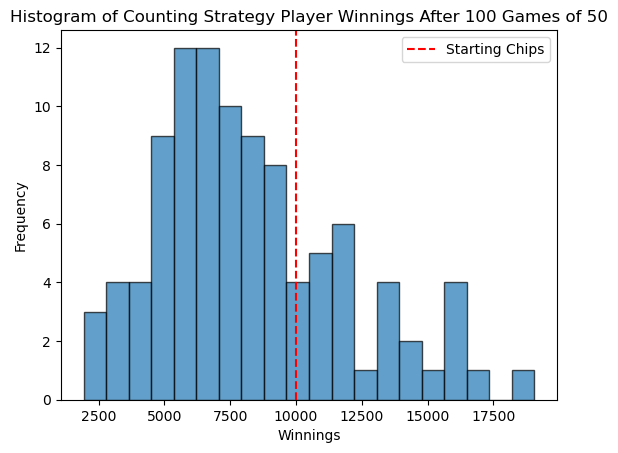

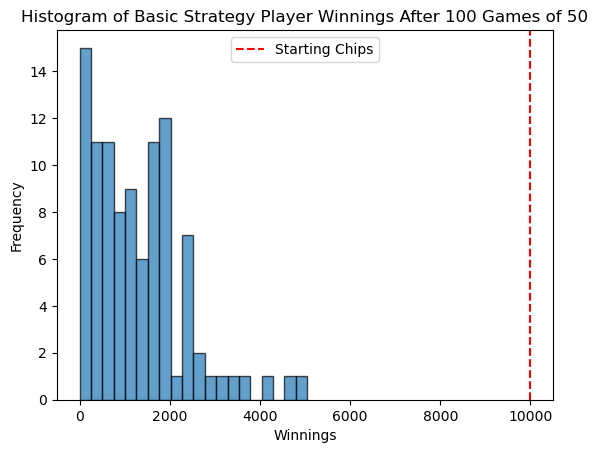

In [34]:
# Plot histogram
plt.hist(winnings_list0, bins=20, edgecolor='black', alpha=0.7)
plt.xlabel('Winnings')
plt.ylabel('Frequency')
plt.title('Histogram of Counting Strategy Player Winnings After 100 Games of 50')
plt.axvline(game2.players[0].bank2, color='red', linestyle='dashed', label='Starting Chips')
plt.legend()
plt.show()

# Plot histogram
plt.hist(winnings_list1, bins=20, edgecolor='black', alpha=0.7)
plt.xlabel('Winnings')
plt.ylabel('Frequency')
plt.title('Histogram of Basic Strategy Player Winnings After 100 Games of 50')
plt.axvline(game2.players[0].bank2, color='red', linestyle='dashed', label='Starting Chips')
plt.legend()
plt.show()